<h1 style="color: green;"> Import Library, Load csv file , EDA ,Data manipulation </h1>


In [1]:
#import all necessary library
import pandas as pd
import langdetect
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
#load all CSV file
train =pd.read_csv("../offence_data/train.csv")
test = pd.read_csv("../offence_data/test.csv")
valid = pd.read_csv("../offence_data/validation.csv") 
test_lebel = pd.read_csv("../offence_data/test_labels.csv") 


<h1 style="color: green;"> just visualize   train , test, validation a  </h1>

In [3]:
train.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


In [4]:
valid.head()

,id,feedback_text,lang,toxic
0,1203,İyi tamam olabilir. Balkanlar maddesini gelişt...,tr,0
1,5871,"Por dios, y la canción de John Lennon: http://...",es,1
2,3590,Selam. Öncelikle tebrik ederim... Bu arada ken...,tr,0
3,447,Leggiti tutte le discussioni. Magari cancellal...,it,1
4,6634,A LAS TOKITAS NOS VALE QUE LAS JONATICAS INSUL...,es,1


In [5]:
test.head()

,id,content,lang
0,56496,"Bahar merhaba, Şu TV programı için bildiğin gi...",tr
1,18266,"Merhaba, başlık taşıma nedeniyle bir karışıklı...",tr
2,37852,kullanıcı ne mutlu türküm diyene yazmış ta...,tr
3,25075,Quand la plaisanterie sur le synopsis de ce fi...,fr
4,330,Não fosse seu esclarecimento no blog da Anne (...,pt


In [6]:
test['Index'] = range(1, len(test) + 1)

In [7]:
test_lebel['Index'] = range(1, len(test_lebel) + 1)

In [8]:
test_lebel.head()

,id,toxic,Index
0,0,0,1
1,1,0,2
2,2,1,3
3,3,0,4
4,4,0,5


In [9]:
#add test lebel and test data
test = test.merge(test_lebel[['Index', 'toxic']], on='Index', how='left')

In [11]:
test['toxic'] = test['toxic'].fillna(2).astype(int)

In [38]:
test.drop('Index', axis=1, inplace=True)

In [19]:
test.tail(50)

,id,content,lang,Index,toxic
5950,31249,se o fanticheiro e fantoche perderem o direit...,pt,5951,0
5951,31336,E Presidente onorario del Comitato Scientific...,it,5952,0
5952,36891,Rengi değiştirdim şu anda düzenle bağlantıları...,tr,5953,1
5953,25486,PS Infelizmente não posso lhe devolver na lata...,pt,5954,0
5954,31761,Kullanıcı sayfanızda da bulunan Botopedia karş...,tr,5955,0
5955,52346,bueno esta pagina si ncesita mas informacion p...,es,5956,0
5956,23414,"Non, je ne pense pas le type donnais des cours...",fr,5957,0
5957,33543,Il faut un champ plus précis pour avoir la cou...,fr,5958,0
5958,13909,"До хрена, до фени, до у@ёру, на фига, на х@ра...",ru,5959,1
5959,3073,"in absentia ? Oh no, quel che ho detto è st...",it,5960,0


In [13]:
count = (test['toxic'] == 2).sum()

print(f"Number of 2s in column: {count}")

Number of 2s in column: 700


In [18]:
test = test[test['toxic'] != 2]

In [14]:
len(test)

6700

<h1 style="color: green;"> Start EDA   </h1>

In [45]:
train.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


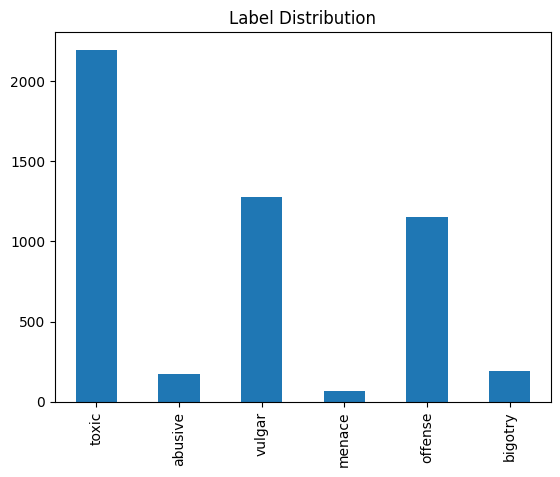

In [ ]:
#Lebel destribuition chart
label_cols = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
train[label_cols].sum().plot(kind="bar", title="Label Distribution")
plt.show()



🔍 Missing values:
 id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
word_count       0
char_count       0
dtype: int64


C:\Users\samra\AppData\Local\Temp\ipykernel_520\3886578663.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="rocket")


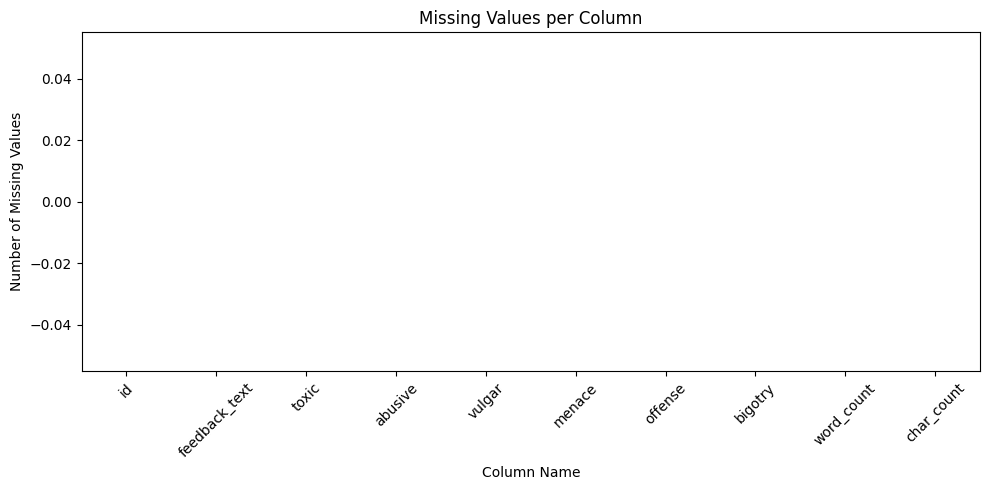


❗ Rows with missing feedback_text: 0


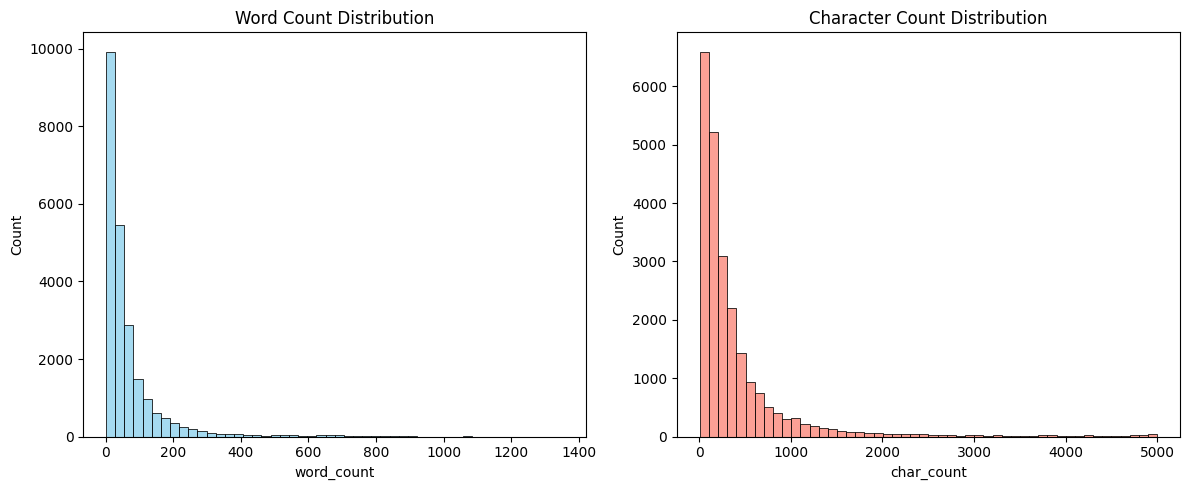

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\samra\AppData\Local\Temp\ipykernel_520\3886578663.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='count', y='word', palette='mako')


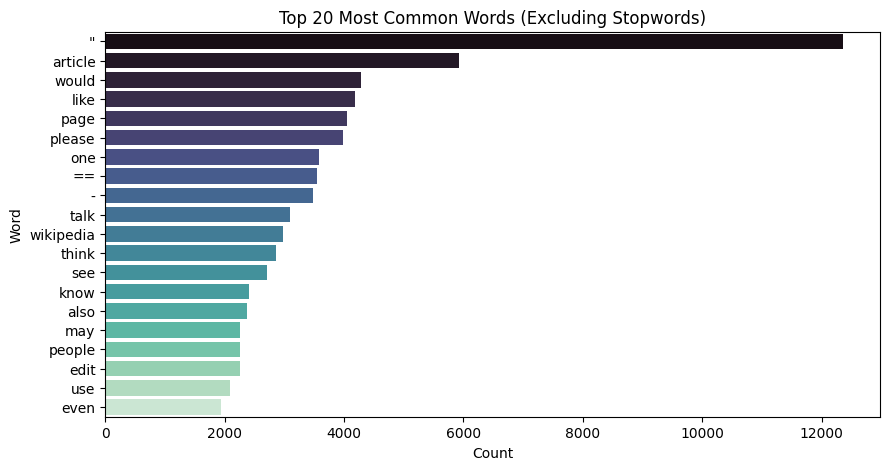

In [22]:
# ================================
# Check for Missing Values
# ================================
print("🔍 Missing values:\n", train.isnull().sum())

# Plot bar chart for missing values
missing_counts = train.isnull().sum()
missing_counts = missing_counts[missing_counts >= 0]  # Only plot columns with missing data

if not missing_counts.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="rocket")
    plt.title("Missing Values per Column")
    plt.ylabel("Number of Missing Values")
    plt.xlabel("Column Name")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Drop rows with missing feedback_text if any
missing_texts = train[train['feedback_text'].isnull()]
print(f"\n❗ Rows with missing feedback_text: {len(missing_texts)}")
if len(missing_texts) > 0:
    train = train.dropna(subset=['feedback_text'])

# ================================
# Word Distribution and Sentence Length
# ================================
train['word_count'] = train['feedback_text'].apply(lambda x: len(str(x).split()))
train['char_count'] = train['feedback_text'].apply(lambda x: len(str(x)))

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train['word_count'], bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('Word Count Distribution')

sns.histplot(train['char_count'], bins=50, ax=axes[1], color='salmon')
axes[1].set_title('Character Count Distribution')
plt.tight_layout()
plt.show()

# ================================
# Most Common Words (Before Preprocessing)
# ================================
from collections import Counter

nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stop words from feedback_text
all_words = ' '.join(train['feedback_text'].astype(str)).lower().split()
filtered_words = [word for word in all_words if word not in stop_words]

# Count the most common words
common_words = Counter(filtered_words)
common_words_df = pd.DataFrame(common_words.most_common(20), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=common_words_df, x='count', y='word', palette='mako')
plt.title("Top 20 Most Common Words (Excluding Stopwords)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\samra\AppData\Local\Temp\ipykernel_520\2436796763.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='count', y='word', palette='mako')


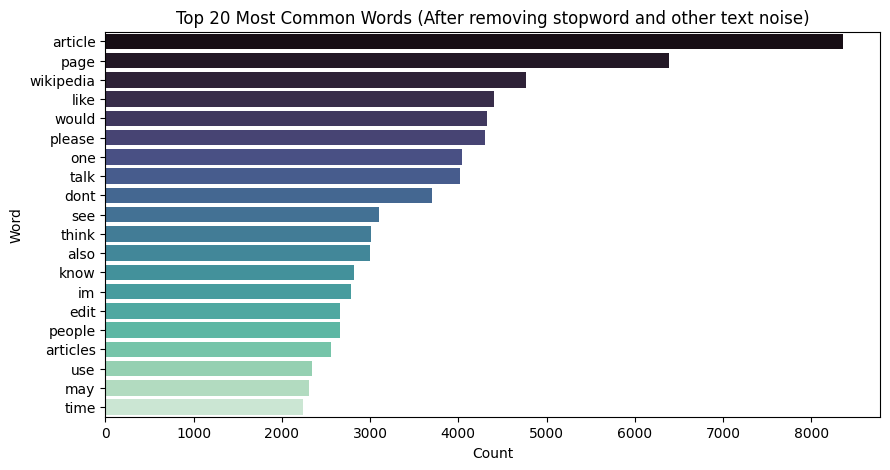

In [24]:
import nltk
import string
import re
from collections import Counter
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean the text (remove stopwords, punctuation, numbers, etc.)
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using str.translate
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers and special characters using regular expressions
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]

    return ' '.join(cleaned_words)

# Apply the clean_text function to the feedback_text column
train['cleaned_feedback_text'] = train['feedback_text'].apply(lambda x: clean_text(str(x)))

# Combine all cleaned words
all_words = ' '.join(train['cleaned_feedback_text']).split()

# Count the most common words
common_words = Counter(all_words)
common_words_df = pd.DataFrame(common_words.most_common(20), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=common_words_df, x='count', y='word', palette='mako')
plt.title("Top 20 Most Common Words (After removing stopword and other text noise)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


In [ ]:
#language detection in 
languages = {}
for text in train['feedback_text'].dropna(): # drop NaN values to avoid errors
    try:
        lang = langdetect.detect(text)
        if lang == 'es':
             print(text)
        languages[lang] = languages.get(lang, 0) + 1
    except langdetect.LangDetectException:
            # Handle cases where language detection fails (e.g., short or ambiguous text)
            print(f"Language detection failed for text: '{text}'")
            pass # or use a default language, or add to a count of undetected items.


In [25]:
from langdetect import detect, LangDetectException
import pandas as pd

# Sample DataFrame (replace this with your real one)
# train = pd.read_csv('your_file.csv')

# Create a list to hold detected languages
detected_languages = []

# Iterate through each feedback text
for text in train['feedback_text']:
    if pd.isna(text):
        detected_languages.append(None)
    else:
        try:
            lang = detect(text)
            detected_languages.append(lang)
        except LangDetectException:
            detected_languages.append(None)  # Or use a default like 'unknown'

# Add the language column to the DataFrame
train['lang'] = detected_languages


In [26]:
train.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry,word_count,char_count,cleaned_feedback_text,lang
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0,13,68,sounds good let know youre done ill start pr,en
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0,85,413,say something didnt actually confirm anything ...,en
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0,22,173,agustina barrientos modelo de piñeiro juán cru...,es
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0,10,73,fyi enjoy licking strangers scrotal sacksespec...,en
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0,88,432,get site many penguins asked question simple g...,en


In [27]:
train['lang'].unique()

array(['en', 'es', 'tl', 'et', 'de', 'fa', 'af', 'no', 'so', 'id', 'fr',
       'vi', 'sl', 'tr', 'pt', 'ro', 'sw', 'hr', 'da', 'sq', 'cy', 'it',
       'cs', 'sv', 'fi', 'nl', 'ar', 'pl', 'bn', 'ca', 'hu', 'lt', 'sk',
       'ru', 'he', 'ko', 'zh-cn', 'gu', 'ta', 'el', None, 'hi', 'th',
       'lv', 'mk', 'ml', 'zh-tw', 'te', 'mr', 'bg'], dtype=object)

In [28]:
print(train['lang'].isnull().sum())

4


In [29]:
train = train.dropna(subset=['lang'])


In [33]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Check available languages in NLTK stopwords corpus
print(stopwords.fileids())


['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'tamil', 'turkish']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# Load multiple languages
languages = ['en', 'es', 'tl', 'et', 'de', 'fa', 'af', 'no', 'so', 'id', 'fr',
       'vi', 'sl', 'tr', 'pt', 'ro', 'sw', 'hr', 'da', 'sq', 'cy', 'it',
       'cs', 'sv', 'fi', 'nl', 'ar', 'pl', 'bn', 'ca', 'hu', 'lt', 'sk',
       'ru', 'he', 'ko', 'zh-cn', 'gu', 'ta', 'el', 'hi', 'th',
       'lv', 'mk', 'ml', 'zh-tw', 'te', 'mr', 'bg']
multi_stop_words = set()
for lang in languages:
    try:
        multi_stop_words.update(stopwords.words(lang))
    except:
        print(f"Stopwords not found for: {lang}")


Stopwords not found for: en
Stopwords not found for: es
Stopwords not found for: tl
Stopwords not found for: et
Stopwords not found for: de
Stopwords not found for: fa
Stopwords not found for: af
Stopwords not found for: no
Stopwords not found for: so
Stopwords not found for: id
Stopwords not found for: fr
Stopwords not found for: vi
Stopwords not found for: sl
Stopwords not found for: tr
Stopwords not found for: pt
Stopwords not found for: ro
Stopwords not found for: sw
Stopwords not found for: hr
Stopwords not found for: da
Stopwords not found for: sq
Stopwords not found for: cy
Stopwords not found for: it
Stopwords not found for: cs
Stopwords not found for: sv
Stopwords not found for: fi
Stopwords not found for: nl
Stopwords not found for: ar
Stopwords not found for: pl
Stopwords not found for: bn
Stopwords not found for: ca
Stopwords not found for: hu
Stopwords not found for: lt
Stopwords not found for: sk
Stopwords not found for: ru
Stopwords not found for: he
Stopwords not found 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Load multiple languages
languages = ['en', 'es', 'tl', 'et', 'de', 'fa', 'af', 'no', 'so', 'id', 'fr',
             'vi', 'sl', 'tr', 'pt', 'ro', 'sw', 'hr', 'da', 'sq', 'cy', 'it',
             'cs', 'sv', 'fi', 'nl', 'ar', 'pl', 'bn', 'ca', 'hu', 'lt', 'sk',
             'ru', 'he', 'ko', 'zh-cn', 'gu', 'ta', 'el', 'hi', 'th',
             'lv', 'mk', 'ml', 'zh-tw', 'te', 'mr', 'bg']

multi_stop_words = set()

# Loop through the list of languages and update the multi_stop_words set
for lang in languages:
    try:
        # Check if stopwords exist for the language
        if lang in stopwords.fileids():
            multi_stop_words.update(stopwords.words(lang))
        else:
            print(f"No stopwords available for: {lang}")
    except Exception as e:
        print(f"Error with language {lang}: {e}")

print(f"Collected {len(multi_stop_words)} stopwords.")


No stopwords available for: en
No stopwords available for: es
No stopwords available for: tl
No stopwords available for: et
No stopwords available for: de
No stopwords available for: fa
No stopwords available for: af
No stopwords available for: no
No stopwords available for: so
No stopwords available for: id
No stopwords available for: fr
No stopwords available for: vi
No stopwords available for: sl
No stopwords available for: tr
No stopwords available for: pt
No stopwords available for: ro
No stopwords available for: sw
No stopwords available for: hr
No stopwords available for: da
No stopwords available for: sq
No stopwords available for: cy
No stopwords available for: it
No stopwords available for: cs
No stopwords available for: sv
No stopwords available for: fi
No stopwords available for: nl
No stopwords available for: ar
No stopwords available for: pl
No stopwords available for: bn
No stopwords available for: ca
No stopwords available for: hu
No stopwords available for: lt
No stopw

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# List of language names (without language codes)
languages = [
    'english', 'spanish', 'tagalog', 'estonian', 'german', 'persian (farsi)', 'afrikaans',
    'norwegian', 'somali', 'indonesian', 'french', 'vietnamese', 'slovenian', 'turkish',
    'portuguese', 'romanian', 'swahili', 'croatian', 'danish', 'albanian', 'welsh', 'italian',
    'czech', 'swedish', 'finnish', 'dutch', 'arabic', 'polish', 'bengali', 'catalan', 'hungarian',
    'lithuanian', 'slovak', 'russian', 'hebrew', 'korean', 'chinese (simplified)', 'gujarati', 
    'tamil', 'greek', 'hindi', 'thai', 'latvian', 'macedonian', 'malayalam', 'chinese (traditional)',
    'telugu', 'marathi', 'bulgarian'
]

multi_stop_words = set()

# Loop through the list of languages and update the multi_stop_words set
for lang in languages:
    try:
        # Check if stopwords exist for the language
        if lang in stopwords.fileids():
            multi_stop_words.update(stopwords.words(lang))
        else:
            print(f"No stopwords available for: {lang}")
    except Exception as e:
        print(f"Error with language {lang}: {e}")

print(f"Collected {len(multi_stop_words)} stopwords.")



No stopwords available for: tagalog
No stopwords available for: estonian
No stopwords available for: persian (farsi)
No stopwords available for: afrikaans
No stopwords available for: somali
No stopwords available for: vietnamese
No stopwords available for: slovenian
No stopwords available for: swahili
No stopwords available for: croatian
No stopwords available for: welsh
No stopwords available for: czech
No stopwords available for: polish
No stopwords available for: lithuanian
No stopwords available for: slovak
No stopwords available for: korean
No stopwords available for: chinese (simplified)
No stopwords available for: gujarati
No stopwords available for: hindi
No stopwords available for: thai
No stopwords available for: latvian
No stopwords available for: macedonian
No stopwords available for: malayalam
No stopwords available for: chinese (traditional)
No stopwords available for: telugu
No stopwords available for: marathi
No stopwords available for: bulgarian
Collected 5292 stopword

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


c:\Users\samra\anaconda3\envs\offence\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


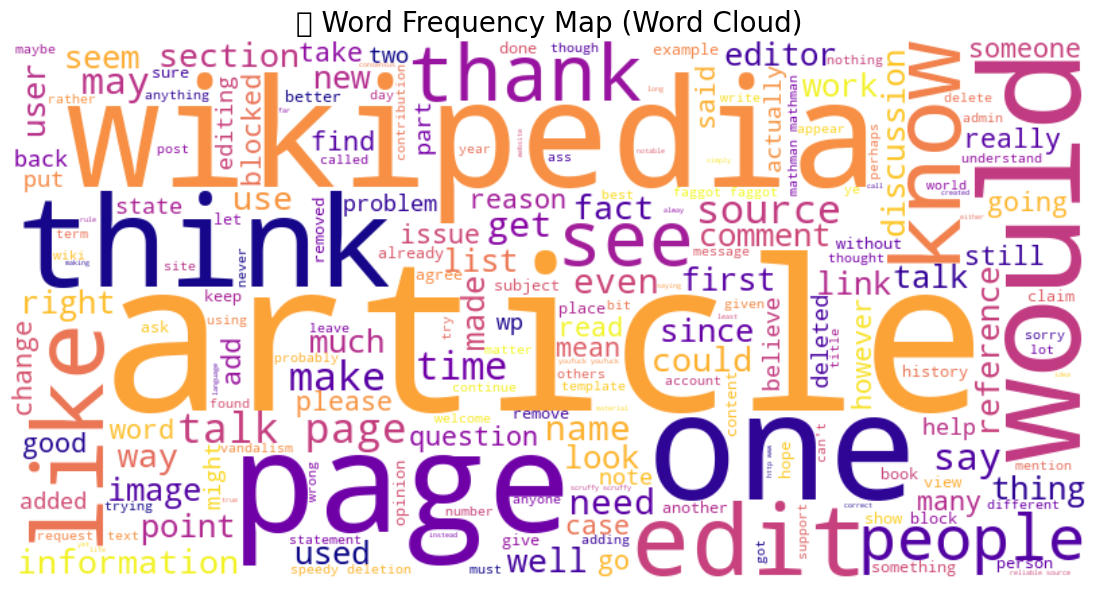

In [43]:
from wordcloud import WordCloud

# Combine all feedback_text into one string
all_text = ' '.join(train['feedback_text'].astype(str)).lower()

# Generate Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=multi_stop_words,
    max_words=200,
    colormap='plasma'
).generate(all_text)

# Plot Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🔤 Word Frequency Map (Word Cloud)", fontsize=20)
plt.show()


In [9]:
test['lang'].unique()

array(['tr', 'fr', 'pt', 'it', 'ru', 'es'], dtype=object)

In [10]:
valid['lang'].unique()

array(['tr', 'es', 'it'], dtype=object)

In [ ]:
valid.head()

,id,feedback_text,lang,toxic
0,1203,İyi tamam olabilir. Balkanlar maddesini gelişt...,tr,0
1,5871,"Por dios, y la canción de John Lennon: http://...",es,1
2,3590,Selam. Öncelikle tebrik ederim... Bu arada ken...,tr,0
3,447,Leggiti tutte le discussioni. Magari cancellal...,it,1
4,6634,A LAS TOKITAS NOS VALE QUE LAS JONATICAS INSUL...,es,1


###just doing trainig test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



📊 Evaluation on Validation Set (toxic only):
Accuracy: 0.9450
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4264
           1       0.92      0.44      0.59       431

    accuracy                           0.95      4695
   macro avg       0.93      0.72      0.78      4695
weighted avg       0.94      0.95      0.94      4695

AUC-ROC: 0.9470


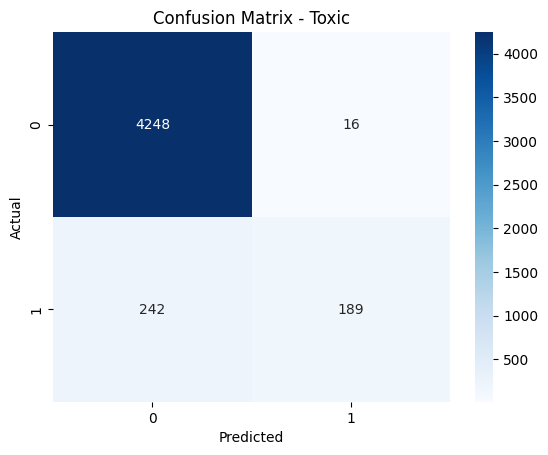


✅ Toxic-only model complete. Predictions saved as 'toxic_only_predictions.csv'


In [ ]:
# ================================
# Offensive Language Classification - Logistic Regression (toxic only)
# ================================

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Setup
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ================================
# Load Dataset
# ================================
train_df = pd.read_csv("../offence_data/train.csv") 
test_df = pd.read_csv("../offence_data/validation.csv")  # This has only 'feedback_text' and 'toxic'

# ================================
# Preprocessing
# ================================
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

train_df['clean_text'] = train_df['feedback_text'].apply(preprocess_text)
test_df['clean_text'] = test_df['feedback_text'].apply(preprocess_text)

# ================================
# Train/Test Split
# ================================
X = train_df['clean_text']
y = train_df['toxic']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
# Build Pipeline & Train
# ================================
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000)),
    ("clf", LogisticRegression(solver='liblinear'))
])

pipeline.fit(X_train, y_train)

# ================================
# Evaluate on Validation Set
# ================================
y_pred = pipeline.predict(X_val)
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

print("\n📊 Evaluation on Validation Set (toxic only):")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(classification_report(y_val, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_val, y_pred_proba):.4f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Toxic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ================================
# Predict on Test Set
# ================================
test_preds = pipeline.predict(test_df['clean_text'])
test_proba = pipeline.predict_proba(test_df['clean_text'])[:, 1]

# Save Submission
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'toxic': test_preds,
    'toxic_probability': test_proba
})
submission_df.to_csv("toxic_only_predictions.csv", index=False)

print("\n✅ Toxic-only model complete. Predictions saved as 'toxic_only_predictions.csv'")




📊 Evaluation on Test Set (toxic only):
Accuracy: 0.8405
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       706
           1       0.00      0.00      0.00       134

    accuracy                           0.84       840
   macro avg       0.42      0.50      0.46       840
weighted avg       0.71      0.84      0.77       840

AUC-ROC: 0.6225


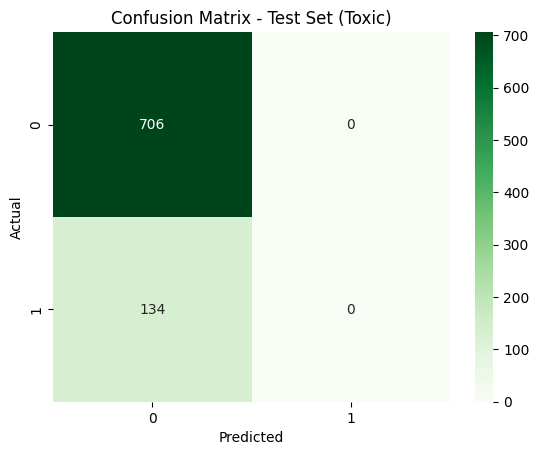


✅ Toxic-only model complete. Predictions saved as 'toxic_only_predictions.csv'


In [ ]:
# ================================
# Predict on Test Set
# ================================
test_preds = pipeline.predict(test_df['clean_text'])
test_proba = pipeline.predict_proba(test_df['clean_text'])[:, 1]

# ✅ Evaluate on Test Set (if it has 'toxic' labels)
if 'toxic' in test_df.columns:
    print("\n📊 Evaluation on Test Set (toxic only):")
    print(f"Accuracy: {accuracy_score(test_df['toxic'], test_preds):.4f}")
    print(classification_report(test_df['toxic'], test_preds))
    print(f"AUC-ROC: {roc_auc_score(test_df['toxic'], test_proba):.4f}")
    
    # Confusion Matrix for Test Set
    sns.heatmap(confusion_matrix(test_df['toxic'], test_preds), annot=True, fmt="d", cmap="Greens")
    plt.title("Confusion Matrix - Test Set (Toxic)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Save Submission
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'toxic': test_preds,
    'toxic_probability': test_proba
})
submission_df.to_csv("toxic_only_predictions.csv", index=False)

print("\n✅ Toxic-only model complete. Predictions saved as 'toxic_only_predictions.csv'")


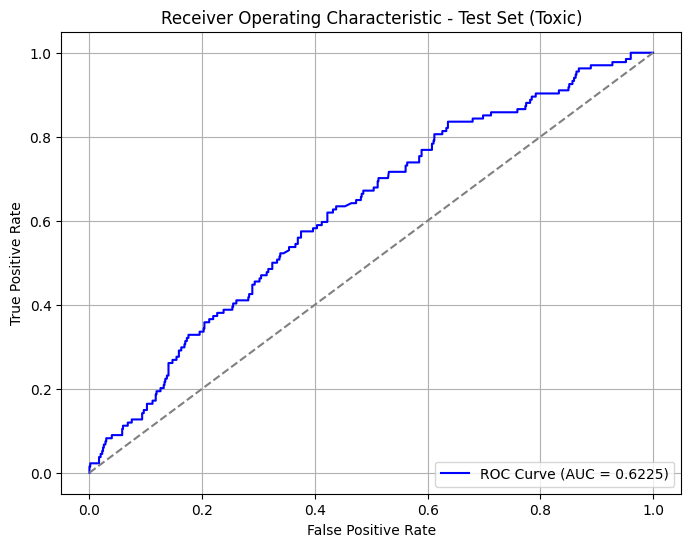

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for test set (toxic)
fpr, tpr, thresholds = roc_curve(test_df['toxic'], test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set (Toxic)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
